In [3]:
using LinearAlgebra

## Broadcasting scalar operations.

In [5]:
x = [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [7]:
x.^2

4-element Array{Int64,1}:
  1
  4
  9
 16

In [8]:
cos(x)  # not defined

MethodError: MethodError: no method matching cos(::Array{Int64,1})
Closest candidates are:
  cos(!Matched::BigFloat) at mpfr.jl:683
  cos(!Matched::Missing) at math.jl:1056
  cos(!Matched::Complex{Float16}) at math.jl:1005
  ...

In [9]:
cos.(x)  # elementwise "broadcast"

4-element Array{Float64,1}:
  0.5403023058681398
 -0.4161468365471424
 -0.9899924966004454
 -0.6536436208636119

In [10]:
cos.(π*x)

4-element Array{Float64,1}:
 -1.0
  1.0
 -1.0
  1.0

In [11]:
x

4-element Array{Int64,1}:
 1
 2
 3
 4

In [12]:
y = [-1,-2,-3]

3-element Array{Int64,1}:
 -1
 -2
 -3

In [13]:
x + y # undefined

DimensionMismatch: DimensionMismatch("dimensions must match")

In [16]:
x .+ y'  # broadcast the operation

4×3 Array{Int64,2}:
 0  -1  -2
 1   0  -1
 2   1   0
 3   2   1

## Vector norms

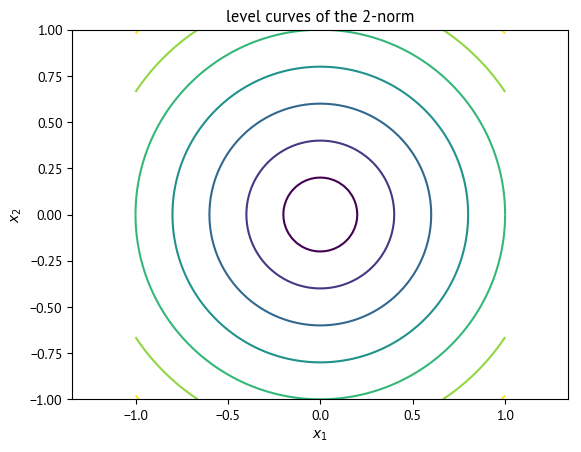

In [17]:
using LinearAlgebra, PyPlot
x = -1:0.025:1;
y = x';
contour(x,x,@. sqrt(x^2 + y^2));
axis("equal");
title("level curves of the 2-norm");
xlabel(L"x_1"); ylabel(L"x_2");

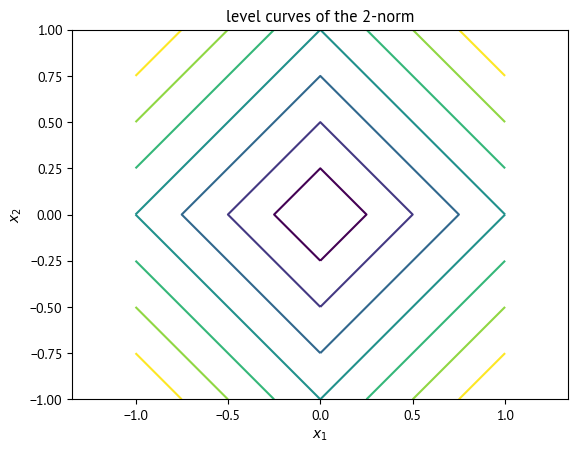

In [18]:
contour(x,x,@. abs(x)+abs(y));
axis("equal");
title("level curves of the 2-norm");
xlabel(L"x_1"); ylabel(L"x_2");

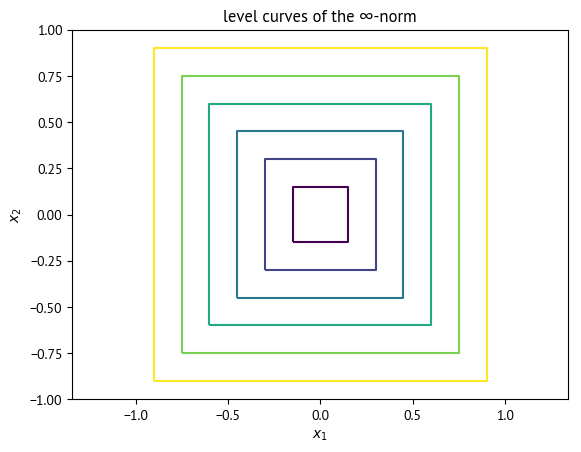

In [22]:
contour(x,x,@. max(abs(x),abs(y)));
axis("equal");
title("level curves of the ∞-norm");
xlabel(L"x_1"); ylabel(L"x_2");

## Matrix norms

In [23]:
A = rand(0:5,2,3)

2×3 Array{Int64,2}:
 4  1  2
 3  4  3

In [24]:
vec(A)

6-element Array{Int64,1}:
 4
 3
 1
 4
 2
 3

In [25]:
norm(A)  # Frobenius

7.416198487095663

In [26]:
norm(vec(A))

7.416198487095663

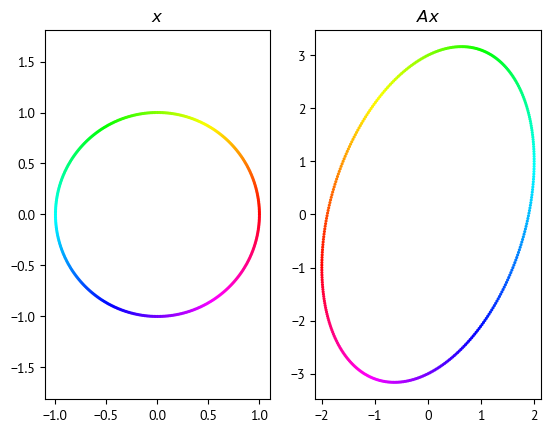

PyObject Text(0.5,1,'$Ax$')

In [27]:
A = [-2 0; -1 3];
t = 0:π/200:2π;
x1 = cos.(t);  
x2 = sin.(t);
Ax = A*[x1';x2'];
subplot(1,2,1)
scatter(x1,x2,20,t,".",cmap="hsv",edgecolor="none") 
axis("equal")
title(L"x")
subplot(1,2,2)
scatter(Ax[1,:],Ax[2,:],20,t,".",cmap="hsv",edgecolor="none")
axis("equal")
title(L"Ax")

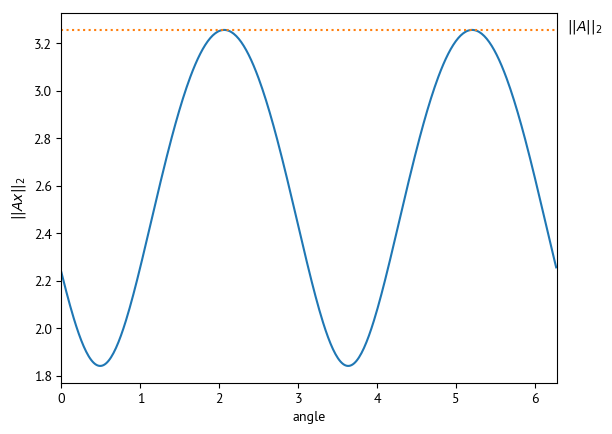

In [28]:
plot(t,[norm(Ax[:,j]) for j=1:size(Ax,2)]);
xlim(0,2*pi);
xlabel("angle");
ylabel(L"||Ax||_2");
plot([0; 2*pi],opnorm(A)*[1;1],":");
text(6.4,opnorm(A),L"||A||_2");

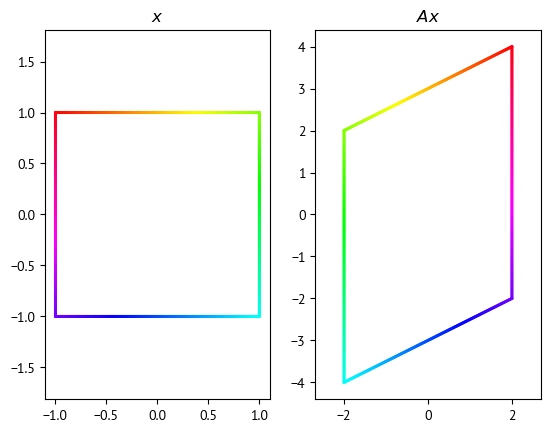

In [29]:
t = -1:0.01:1;  
o = ones(size(t));
x1 = [t;o;-t;-o];  
x2 = [o;-t;-o;t];
Ax = A*[x1';x2'];
subplot(1,2,1)
scatter(x1,x2,20,1:length(x1),".",cmap="hsv",edgecolor="none") 
axis("equal")
title(L"x")
subplot(1,2,2)
scatter(Ax[1,:],Ax[2,:],20,1:length(x1),".",cmap="hsv",edgecolor="none")
axis("equal")
title(L"Ax");

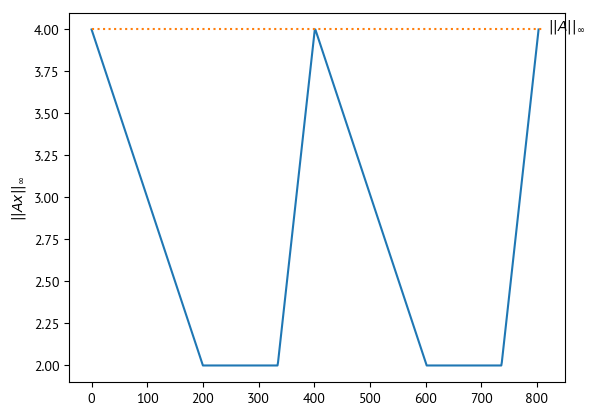

PyObject Text(820,4,'$||A||_{\\infty}$')

In [30]:
plot([norm(Ax[:,j],Inf) for j=1:size(Ax,2)]);
ylabel(L"||Ax||_{\infty}")
plot([1;810],opnorm(A,Inf)*[1;1],":")
text(820,opnorm(A,Inf),L"||A||_{\infty}")

In [31]:
A = [-2 0; -1 3]

2×2 Array{Int64,2}:
 -2  0
 -1  3

In [32]:
opnorm(A)

3.2566165379829406

In [33]:
opnorm(A,Inf)

4.0